# Playground to get acquainted with using MatPlotLib 3d

#### imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import PillowWriter


(-2.0, 2.0)

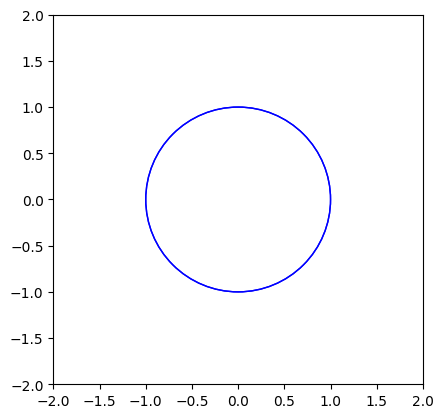

In [17]:
import matplotlib.patches as patches        
fig, ax = plt.subplots()

circle = patches.Circle((0, 0), radius=1, edgecolor='blue', facecolor = 'None')
ax.add_patch(circle)

ax.add_patch(circle)
ax.set_aspect('equal') # Ensure the circle appears as a circle, not an ellipse
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)



#### Plotting single points in 3 dimensional space

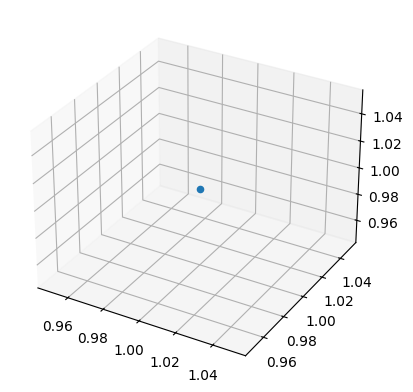

In [ ]:
# create a new axis, projection is the type of coordinate system
ax = plt.axes(projection="3d")

# scatter plot to create an individual point
ax.scatter(1,1,1)

#unnecessary in a notebook, necessary in another file
plt.show()

#### Plotting multiple points in a scatter plot

#### can customize marker (marker="v") and transparency (alpha = 0.1), etc in .scatter

Non-randomized points


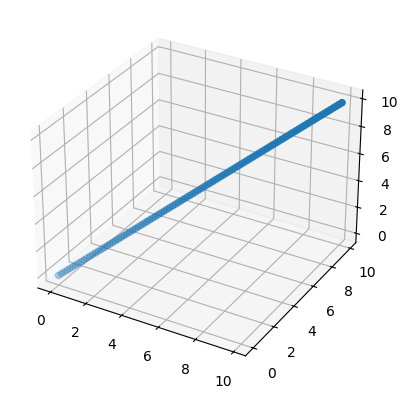

Randomized Points


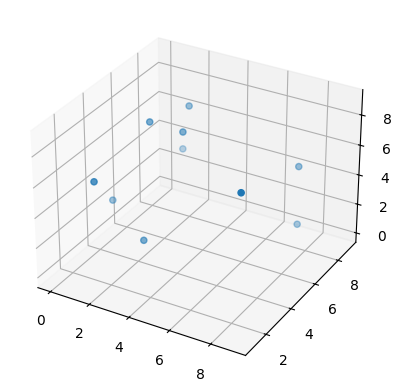

In [16]:
# creating multiple points
ax = plt.axes(projection="3d")

# creates an array of points from a to b with step size c
x_data = np.arange(0,10,0.1)
y_data = np.arange(0,10,0.1)
z_data = np.arange(0,10,0.1)

ax.scatter3D(x_data,y_data,z_data)

print("Non-randomized points")
plt.show()


ax1 = plt.axes(projection="3d")

# creates an array of 10 random points
x_data = np.random.randint(0,10, 10)
y_data = np.random.randint(0,10, 10)
z_data = np.random.randint(0,10, 10)

ax1.scatter3D(x_data,y_data, z_data)

print("Randomized Points")
plt.show()


#### Plotting functions/lines

#### use plot instead of scatter

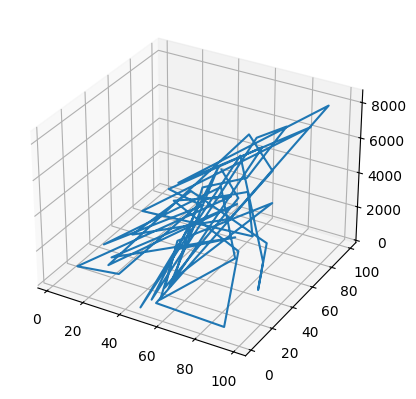

In [ ]:
ax = plt.axes(projection = "3d")

x_data = np.random.randint(0,100,50)
y_data = np.random.randint(0,100,50)
z_data = x_data * y_data

ax.plot(x_data,y_data,z_data)

plt.show()


## Formatting

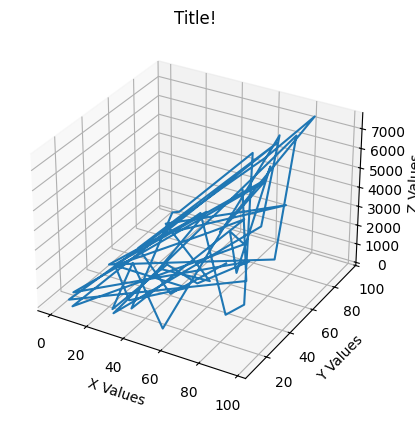

In [ ]:
ax = plt.axes(projection = "3d")

x_data = np.random.randint(0,100,50)
y_data = np.random.randint(0,100,50)
z_data = x_data * y_data

ax.set_title("Title!")
ax.set_xlabel("X Values")
ax.set_ylabel("Y Values")
ax.set_zlabel("Z Values")

ax.plot(x_data,y_data,z_data)

plt.show()

## Surface Plots


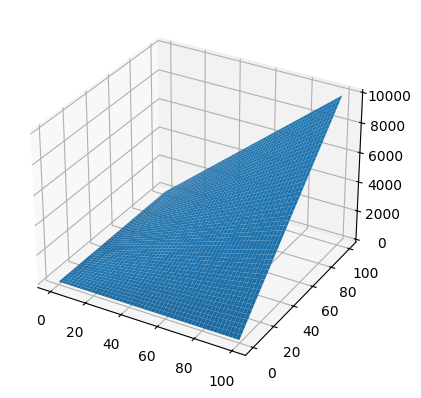

In [22]:
ax = plt.axes(projection="3d")

# produce a bunch of points on lines for x and y
x_data = np.arange(0,100,0.1)
y_data = np.arange(0,100,0.1)

# create a grid of these x and y data points
X, Y = np.meshgrid(x_data, y_data)

# as far as I understand, this is just multiplying corresponding elements 
Z = X*Y

ax.plot_surface(X,Y,Z)

plt.show()



## Formatting

#### Can mess with color maps while plotting and set the initial view of the plot

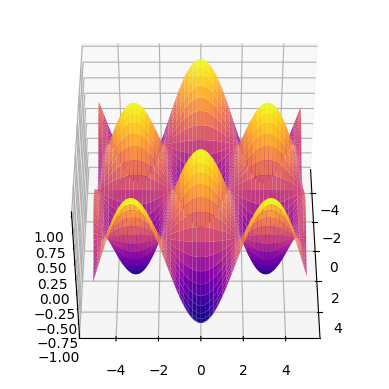

In [26]:
ax = plt.axes(projection="3d")

x_data = np.arange(-5,5,0.1)
y_data = np.arange(-5,5,0.1)

X, Y = np.meshgrid(x_data, y_data)

Z = np.sin(X)*np.cos(Y)

# can initialize the view 
ax.view_init(azim=0, elev=45)
ax.plot_surface(X,Y,Z, cmap="plasma") # coloring the surface, other color maps available


plt.show()

## Animations!

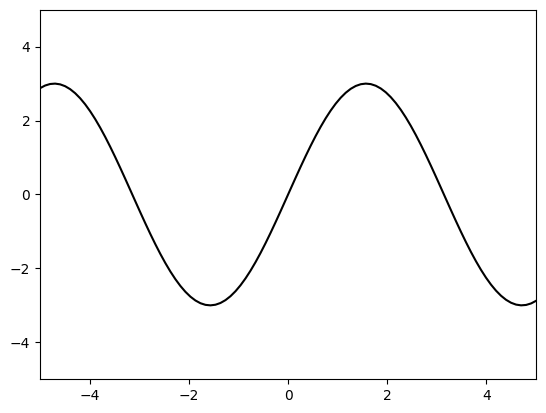

In [ ]:
fig = plt.figure()
l, = plt.plot([],[],"k-")

plt.xlim(-5,5)
plt.ylim(-5,5)

def func(x):
    return 3 * np.sin(x)

metadata = dict(title='Movie',artist="me")
writer = PillowWriter(fps = 24, metadata=metadata)

xlist = []
ylist = []

# 100 represents the dpi
# making and saving a bunch of frames
with writer.saving(fig, "sinWave.gif", 100):
    for xval in  np.linspace(-5,5,100):
        xlist.append(xval)
        ylist.append(func(xval))

        l.set_data(xlist,ylist)

        writer.grab_frame()

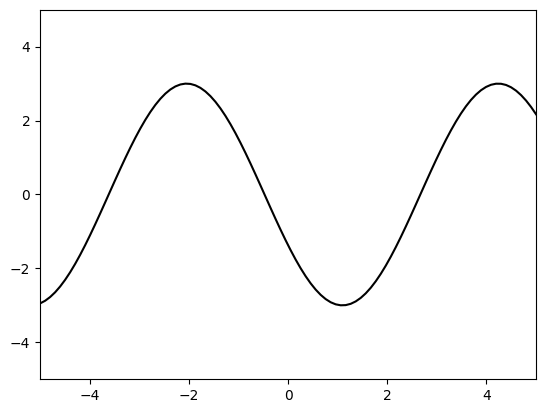

In [ ]:
fig = plt.figure()
l, = plt.plot([],[],"k-")

plt.xlim(-5,5)
plt.ylim(-5,5)

def func(x):
    return 3 * np.sin(x)

xlist = np.linspace(-5,5,100)

metadata = dict(title='Movie',artist="me")
writer = PillowWriter(fps = 24, metadata=metadata)

# 100 represents the dpi
# making and saving a bunch of frames
with writer.saving(fig, "movingSinWave.gif", 100):
    for i in range(0,100):

        ylist = func(xlist + i/10)

        l.set_data(xlist,ylist)

        writer.grab_frame()

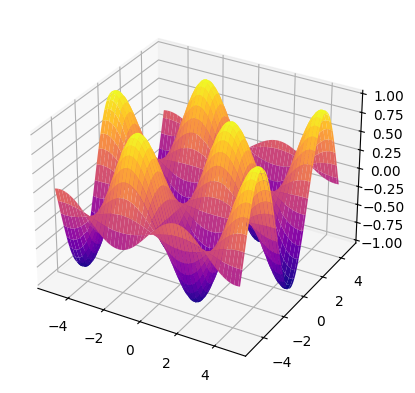

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x_data = np.arange(-5,5,0.1)
y_data = np.arange(-5,5,0.1)

X, Y = np.meshgrid(x_data, y_data)

Z = np.sin(X)*np.cos(Y)

ax.plot_surface(X,Y,Z, cmap="plasma") # coloring the surface, other color maps available


plt.show()

metadata = dict(title='Movie',artist="me")
writer = PillowWriter(fps = 24, metadata=metadata)

# 100 represents the dpi
# making and saving a bunch of frames
with writer.saving(fig, "animations/animatingSurface.gif", 100):
    for i in range(0,100):

        Z = np.sin(X + i/10)*np.cos(Y+ i/10)
        ax.plot_surface(X,Y,Z, cmap="plasma") # coloring the surface, other color maps available

        writer.grab_frame()
    
        ax.cla() # clears the previous frame

## Interpolation

In [17]:
import numpy as np
import pandas as pd

# smoothy transitions from one 1D array to another

array1 = [0,1,2,3,4]
array2 = [9,3,1,3,4]
numPoints = 5

interpolatedArrays = []
for i in range(len(array1)):
    interpolatedArrays.append(np.linspace(array1[i], array2[i],numPoints))

interpolatedArrays = np.array(interpolatedArrays, dtype=np.float64)

df = pd.DataFrame(interpolatedArrays)
df = df.T
interpolatedArrays = df.to_numpy()
print(interpolatedArrays)

[[0.   1.   2.   3.   4.  ]
 [2.25 1.5  1.75 3.   4.  ]
 [4.5  2.   1.5  3.   4.  ]
 [6.75 2.5  1.25 3.   4.  ]
 [9.   3.   1.   3.   4.  ]]


## Transforming between functions smoothly


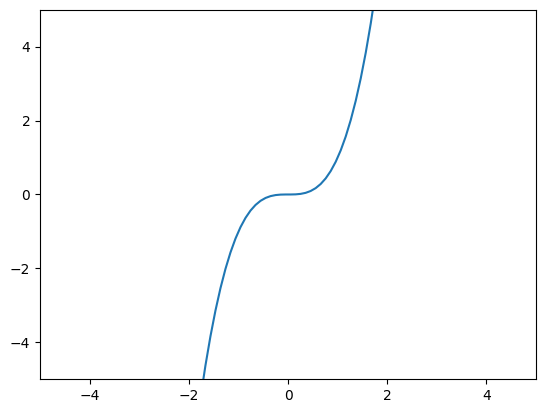

In [33]:
fig = plt.figure()
l, = plt.plot([],[],"k-")

plt.xlim(-5,5)
plt.ylim(-5,5)

theta = np.linspace(0, 2*np.pi,100)

circleX = np.cos(theta)
circleY = np.sin(theta)

lineX = np.linspace(-5,5,100)
lineY = lineX **3

plt.plot(lineX,lineY)

plt.show()

metadata = dict(title='Movie',artist="me")
writer = PillowWriter(fps = 24, metadata=metadata)

with writer.saving(fig, "animations/interpolatingBetweenFunctions.gif", 100):
    for i in range(0,101):
        
        t = i/100

        l.set_data((1-t) * lineX + t*circleX, (1-t)* lineY + t*circleY)

        writer.grab_frame()

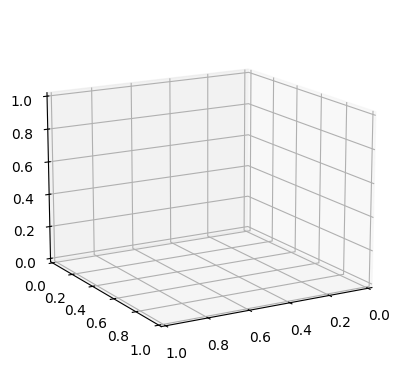

In [97]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


#variables 
radius = 3 / (2 * np.pi)
numPoints = 7
scope = 3

x_data = np.linspace(0,3,100)
y_data = np.linspace(0,3,100)

# flat plane
planeY, planeX = np.meshgrid(x_data, y_data)
planeY = (planeY *-1) + 3
planeZ = planeX * 0

# cylinder
theta = np.linspace(0,1,100)
t = np.linspace(0, 3, 100)
theta_grid, t_grid = np.meshgrid(theta,t)

cylX = t_grid
cylY = radius * np.cos(theta_grid) + 1.5
cylZ = radius * np.sin(theta_grid) 

#torus 
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)
c = 1
torusX = -1 * (c + radius*np.cos(theta_grid)) * np.cos(phi_grid)
torusY = (c + radius*np.cos(theta_grid)) * np.sin(phi_grid)
torusZ = radius * np.sin(theta_grid)

metadata = dict(title='Movie',artist="me")
writer = PillowWriter(fps = 15, metadata=metadata)

with writer.saving(fig, "animations/interpolatingBetweenFunctions2.gif", 100):
    # transforms from a plane to a quarter cylinder
    t_range = np.linspace(0,1,numPoints)
    for t in t_range:
        X = (1-t)*planeX + t* cylX
        Y = (1-t)*planeY + t* cylY
        Z = (1-t)*planeZ + t* cylZ

        # sets scope
        ax.set_xlim(0,scope)
        ax.set_ylim(0,scope)
        ax.set_zlim(0,scope)

        ax.view_init(azim=60, elev=15)
        ax.plot_surface(X, Y, Z)

        writer.grab_frame()
    
        ax.cla() # clears the previous frame
    theta_range = np.linspace(1, 2 * np.pi, numPoints)
    t = np.linspace(0, 3, 100)
    cylX = t_grid
    # quarter circle to a full cylinder
    for theta_max in theta_range:
        
        # cylinder
        theta = np.linspace(0,theta_max,100)
        theta_grid, t_grid = np.meshgrid(theta,t)

        cylY = radius * np.cos(theta_grid)+ 1.5
        cylZ = radius * np.sin(theta_grid) 

        # sets scope
        ax.set_xlim(0,scope)
        ax.set_ylim(0,scope)
        ax.set_zlim(0,scope)

        ax.view_init(azim=60, elev=15)
        ax.plot_surface(cylX,cylY,cylZ)

        writer.grab_frame()
    
        ax.cla() # clears the previous frame
    # full cylinder to a half torus
    t_range = np.linspace(0,1,numPoints)
    for t in t_range:
        X = (1-t)*cylX + t* torusX
        Y = (1-t)*cylY + t* torusY
        Z = (1-t)*cylZ + t* torusZ

        # sets scope
        ax.set_xlim(0,scope)
        ax.set_ylim(0,scope)
        ax.set_zlim(0,scope)

        ax.view_init(azim=60, elev=15)
        ax.plot_surface(X, Y, Z)

        writer.grab_frame()
    
        ax.cla() # clears the previous frame
    # half torus to a full torus
    phi_range = np.linspace(np.pi, 2.*np.pi, numPoints)
    theta = np.linspace(0, 2.*np.pi, 100)
    for phi_val in phi_range:
        phi = np.linspace(0, phi_val, 100)
        theta_grid, phi_grid = np.meshgrid(theta, phi)
        torusX = (1 + radius*np.cos(theta_grid)) * np.cos(phi_grid)
        torusY = (1 + radius*np.cos(theta_grid)) * np.sin(phi_grid)
        torusZ = radius * np.sin(theta_grid)

        # sets scope
        ax.set_xlim(0,scope)
        ax.set_ylim(0,scope)
        ax.set_zlim(0,scope)


        ax.plot_surface(torusX,torusY,torusZ)

        writer.grab_frame()
    
        ax.cla() # clears the previous frame

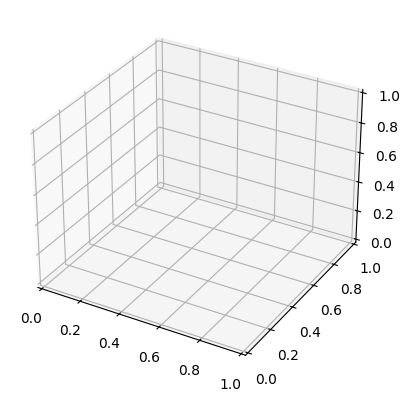

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#variables 
radius = 3 / (2 * np.pi)
numPoints = 7
scope = 3

x_data = np.linspace(0,3,100)
y_data = np.linspace(0,3,100)

# flat plane
planeY, planeX = np.meshgrid(x_data, y_data)
planeY = (planeY *-1) + 3
planeZ = planeX * 0

# cylinder
theta = np.linspace(0,1,100)
t = np.linspace(0, 3, 100)
theta_grid, t_grid = np.meshgrid(theta,t)

cylX = t_grid
cylY = radius * np.cos(theta_grid) + 1.5
cylZ = radius * np.sin(theta_grid) 

"""
provides an array of surface plots that linearly interpolate between two plots

parameters:
numPoints: the number of arrays to get from start to end (inclusive)
start: the start plot
end: the end plot

returns:
an array of surface plots
"""
def linearInterpolation(numPoints,start,end):
    interpolatedArrays = []

    t_range = np.linspace(0,1,numPoints)
    for t in t_range:
        interpolatedArrays.append((1-t) * start + t*end)
    return interpolatedArrays


XArrays = linearInterpolation(20,planeX, cylX)
YArrays = linearInterpolation(20,planeY, cylY)
ZArrays = linearInterpolation(20,planeZ, cylZ)

with writer.saving(fig, "animations/testing.gif", 100):
    for i in range(0,len(XArrays)):
        # sets scope
        ax.set_xlim(0,scope)
        ax.set_ylim(0,scope)
        ax.set_zlim(0,scope)

        ax.plot_surface(XArrays[i],YArrays[i],ZArrays[i])
        
        writer.grab_frame()
    
        ax.cla() # clears the previous frame
